# Лабораторная работа 2.11: Эллиптическое уравнение (уравнение Лапласа)

## Формулировка задачи

Решается двумерное уравнение Лапласа в прямоугольной области:

$$\Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$

где:
- $u(x,y)$ - искомая функция (например, температура или потенциал)
- $x \in [0, \pi]$ - координата по оси $x$
- $y \in [0, 1]$ - координата по оси $y$

**Граничные условия:**
- $u(x, 0) = \sin(x)$ - нижняя граница
- $u(x, 1) = \sin(2x)$ - верхняя граница
- $u(0, y) = 0$ - левая граница
- $u(\pi, y) = 0$ - правая граница

---

## Аналитическое решение

Решение находится методом разделения переменных. Для заданных граничных условий решение имеет вид:

$$u(x, y) = \frac{\sin(x) \sinh(1-y)}{\sinh(1)} + \frac{\sin(2x) \sinh(2y)}{\sinh(2)}$$

Это решение представляет собой сумму двух гармоник:
- Первая гармоника: $\sin(x)$ по $x$ и $\sinh(1-y)/\sinh(1)$ по $y$
- Вторая гармоника: $\sin(2x)$ по $x$ и $\sinh(2y)/\sinh(2)$ по $y$

---

## Численный алгоритм (метод итераций)

Используется **метод Якоби** (итерационный метод):

1. **Дискретизация уравнения Лапласа:**
   $$\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2} = 0$$

2. **Итерационная формула:**
   $$u_{i,j}^{(k+1)} = \frac{\Delta y^2 (u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)}) + \Delta x^2 (u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)})}{2(\Delta x^2 + \Delta y^2)}$$
   
   Значение в точке $(i,j)$ на новой итерации вычисляется как взвешенное среднее соседних точек.

3. **Алгоритм:**
   - Инициализация граничных условий
   - Инициализация внутренних точек (можно нулями или произвольными значениями)
   - Итерационный процесс:
     - Сохранение предыдущего приближения
     - Обновление всех внутренних точек по итерационной формуле
     - Проверка сходимости: $\max |u^{(k+1)} - u^{(k)}| < \varepsilon$
     - Если условие выполнено - остановка, иначе продолжение итераций

4. **Критерий сходимости:**
   В коде используется $\varepsilon = 10^{-5}$ - максимальная допустимая разность между итерациями.


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
Lx = np.pi
Ly = 1.0
Nx = 50
Ny = 50

dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)


In [29]:
# Аналитическое решение
def u_analytical(x_val, y_val):
    term1 = np.sin(x_val) * np.sinh(1 - y_val) / np.sinh(1)
    term2 = np.sin(2 * x_val) * np.sinh(2 * y_val) / np.sinh(2)
    return term1 + term2

u_analytical_grid = np.zeros((Ny, Nx))
for j in range(Ny):
    for i in range(Nx):
        u_analytical_grid[j, i] = u_analytical(x[i], y[j])


In [30]:
# Численное решение
u = np.zeros((Ny, Nx))

# Граничные условия
u[:, 0] = 0
u[:, -1] = 0
u[0, :] = np.sin(x)
u[-1, :] = np.sin(2 * x)


for iteration in range(1500):
    u_old = u.copy()
    
    # Обновление внутренних точек
    for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
            u[j, i] = (dy**2 * (u[j, i+1] + u[j, i-1]) + dx**2 * (u[j+1, i] + u[j-1, i])) / (2 * (dx**2 + dy**2))
    
    # Проверка сходимости
    if np.max(np.abs(u - u_old)) < 1e-5:
        break


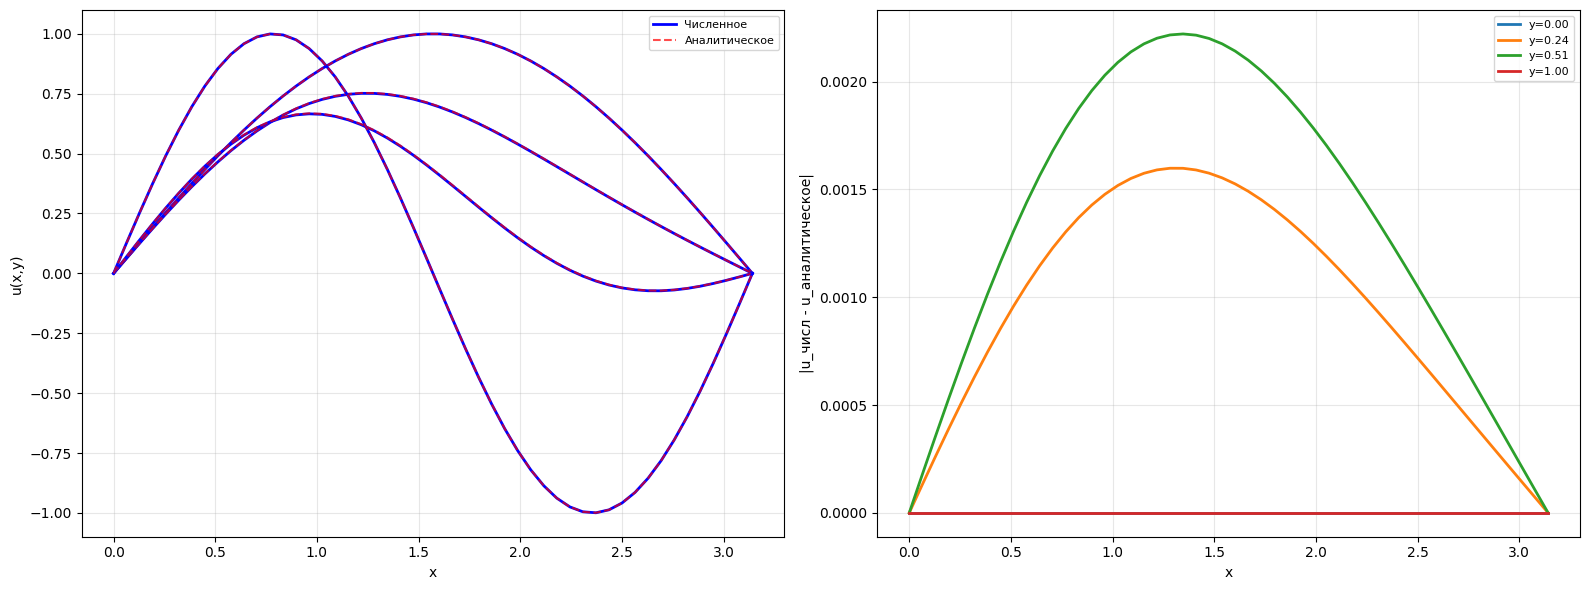

In [31]:
# Сравнение решений
error = np.abs(u - u_analytical_grid)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


y_indices = [0, Ny//4, Ny//2, Ny-1]
for idx in y_indices:
    if idx == y_indices[0]:
        ax1.plot(x, u[idx, :], 'b-', label='Численное', linewidth=2)
        ax1.plot(x, u_analytical_grid[idx, :], 'r--', label='Аналитическое', linewidth=1.5, alpha=0.7)
    else:
        ax1.plot(x, u[idx, :], 'b-', linewidth=2)
        ax1.plot(x, u_analytical_grid[idx, :], 'r--', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,y)')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)


for idx in y_indices:
    ax2.plot(x, error[idx, :], label=f'y={y[idx]:.2f}', linewidth=2)
ax2.set_xlabel('x')
ax2.set_ylabel('|u_числ - u_аналитическое|')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
